# Imputation Methods & Resources

In [1]:
# just a helper function for easier youtube call
def strip_url(url):
    return url.replace('https://youtu.be/','')

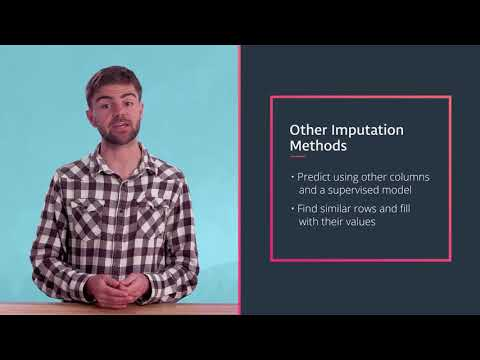

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/CEWIPjz_gCE'))

Imputation is likely the most common method for working with missing values for any data science team. The methods shown here included the frequently used methods of imputing the mean, median, or mode of a column into the missing values for the column.

There are many advanced techniques for imputing missing values including using machine learning and Bayesian statistical approaches. This could be techniques as simple as using k-nearest neighbors to find the features that are most similar, and using the values those features have to fill in values that are missing or complex methods like those in the very popular [AMELIA library](https://cran.r-project.org/web/packages/Amelia/Amelia.pdf).

Regardless of your imputation approach, you should be very cautious of the **bias** you are incorporating into any model that uses these imputed values. Though imputing values is very common and often leads to better predictive power in machine learning models, it can lead to overgeneralizations. In extremely advanced techniques in Data Science, there can be [ethical implications](https://intelligence.org/files/EthicsofAI.pdf) of such bias. Machines can only 'learn' from the data they are provided. If you provide biased data (due to imputation, poor data collection, etc.), it should be no surprise that you will achieve results that are biased.

### Imputation Methods and Resources

One of the most common methods for working with missing values is by imputing the missing values.  Imputation means that you input a value for values that were originally missing. 

It is very common to impute in the following ways:
1. Impute the **mean** of a column.<br><br>

2. If you are working with categorical data or a variable with outliers, then use the **mode** of the column.<br><br>

3. Impute 0, a very small number, or a very large number to differentiate missing values from other values.<br><br>

4. Use KNN to impute values based on features that are most similar.<br><br>

In general, you should try to be more careful with missing data in understanding the real world implications and reasons for why the missing values exist.  At the same time, these solutions are very quick, and they enable you to get models off the ground.  You can then iterate on your feature engineering to be more careful as time permits.

Let's take a look at how some of them work. Chris' content is again very helpful for many of these items - and you can access it [here](https://chrisalbon.com/).  He uses the [sklearn.preprocessing library](http://scikit-learn.org/stable/modules/preprocessing.html).  There are also a ton of ways to fill in missing values directly using pandas, which can be found [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html).

Create the dataset you will be using for this notebook using the code below.


In [3]:
import pandas as pd
import numpy as np
import ImputationMethods as t

df = pd.DataFrame({'A':[np.nan, 2, np.nan, 0, 7, 10, 15],
                   'B':[3, 4, 5, 1, 2, 3, 5],
                   'C':[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                   'D':[np.nan, True, np.nan, False, True, False, np.nan],
                   'E':['Yes', 'No', 'Maybe', np.nan, np.nan, 'Yes', np.nan]})

df

,A,B,C,D,E
0,NaN,3,NaN,NaN,Yes
1,2.0,4,NaN,True,No
2,NaN,5,NaN,NaN,Maybe
3,0.0,1,NaN,False,NaN
4,7.0,2,NaN,True,NaN
5,10.0,3,NaN,False,Yes
6,15.0,5,NaN,NaN,NaN


#### Question 1

**1.** Use the dictionary below to label the columns as the appropriate data type.

In [4]:
a = 'categorical'
b = 'quantitative'
c = 'we cannot tell'
d = 'boolean - can treat either way'

question1_solution = {'Column A is': b,
                      'Column B is': b,
                      'Column C is': c,
                      'Column D is': d,
                      'Column E is': a
                     }

# Check your answer
t.var_test(question1_solution)

Nice job! That looks right to me!


#### Question 2

**2.** Are there any columns or rows that you feel comfortable dropping in this dataframe?

In [5]:
a = "Yes"
b = "No"

should_we_drop = a

#Check your answer
t.can_we_drop(should_we_drop)

That's right! You should feel comfortable dropping any rows or columns that are completely missing values (or if they are all the exact same value).  However, dropping other columns or rows, even if only containing a few values, should go through further consideration.


In [6]:
# Use this cell to drop any columns or rows you feel comfortable dropping based on the above
new_df = df.drop('C', axis=1)
new_df

,A,B,D,E
0,NaN,3,NaN,Yes
1,2.0,4,True,No
2,NaN,5,NaN,Maybe
3,0.0,1,False,NaN
4,7.0,2,True,NaN
5,10.0,3,False,Yes
6,15.0,5,NaN,NaN


#### Question 3

**3.** Using **new_df**, I wrote a lambda function that you can use to impute the mean for the columns of your dataframe using the **apply** method.  Use as many cells as you need to correctly fill in the dictionary **impute_q3** to answer a few questions about your findings.

In [7]:
fill_mean = lambda col: col.fillna(col.mean())

try:
    new_df.apply(fill_mean, axis=0)
except:
    print('That broke...')

That broke...


In [8]:
# Check what you need to answer the questions below
new_df[['A', 'B', 'D']].apply(fill_mean, axis=0)

,A,B,D
0,6.8,3,0.5
1,2.0,4,True
2,6.8,5,0.5
3,0.0,1,False
4,7.0,2,True
5,10.0,3,False
6,15.0,5,0.5


In [9]:
a = "fills with the mean, but that doesn't actually make sense in this case."
b = "gives an error."
c = "is no problem - it fills the NaN values with the mean as expected."


impute_q3 = {'Filling column A': c,
             'Filling column D': a,
             'Filling column E': b # because column E is a string    
}

#Check your answer
t.impute_q3_check(impute_q3)

Nice job! That's right only the first column fills with the mean correctly.  We can't fill the mean of a categorical variable, and the boolean treats the True as 1 and False as 0 to give values that are not 1 or 0.


#### Question 4

**4.** Given the results above, it might make more sense to fill some columns with the mode.  Write your own function to fill a column with the mode value, and use it on the two columns that might benefit from this type of imputation.  Use the dictionary **impute_q4** to answer some questions about your findings.

In [10]:
#Similar to the above write a function and apply it to compte the mode for each column
#If you get stuck, here is a helpful resource https://stackoverflow.com/questions/42789324/pandas-fillna-mode

fill_mode = lambda col: col.fillna(col.mode()[0])
new_df = new_df.apply(fill_mode, axis=0)

In [11]:
new_df.head()

,A,B,D,E
0,0.0,3,False,Yes
1,2.0,4,True,No
2,0.0,5,False,Maybe
3,0.0,1,False,Yes
4,7.0,2,True,Yes


In [12]:
a = "Did not impute the mode."
b = "Imputes the mode."


impute_q4 = {'Filling column A': a,
             'Filling column D': a,
             'Filling column E': b
            }

#Check your answer
t.impute_q4_check(impute_q4)

Nice job! That's right only one of these columns actually imputed a mode.  None of the values in the first column appeared more than once, and 0 was imputed for all of the NaN values.  There were an even number of True and False values, and False was imputed for all the NaN values.


You saw two of the most common ways to impute values in this notebook, and hopefully, you realized that even these methods have complications.  Again, these methods can be a great first step to get your models off the ground, but there are potentially detrimental aspects to the bias introduced into your models using these methods.

# Exercise Solution: Imputation Methods & Resources

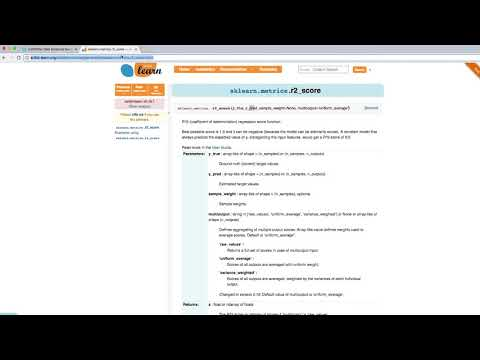

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/OwEWSBitF-Q'))